## Minimal example with TensorFlow

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [4]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs= generated_inputs, targets= generated_targets)

### Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')

In [9]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 42.4811
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6972
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5632
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6688
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4469
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3832
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3654
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3574
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3548
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3570
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 13/100
32/32 [================

### Extract the weights and biases

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9791435],
       [-3.0165672]], dtype=float32)

In [11]:
bias = model.layers[0].get_weights()[1]
bias

array([5.000684], dtype=float32)

### Extract the outputs (make predictions)

In [14]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-19.4],
       [-14. ],
       [-16.9],
       [-27.2],
       [-14.2],
       [ 52.4],
       [ 13.4],
       [-29.2],
       [ 38.9],
       [-24.2],
       [ -4.3],
       [ -9.6],
       [  2.3],
       [  5.5],
       [-23.8],
       [ 31.6],
       [-14.9],
       [  3.6],
       [ 17.2],
       [-22.9],
       [  9.3],
       [  3.8],
       [ -7.6],
       [ 21.2],
       [-11.6],
       [  2.8],
       [ 28.6],
       [-24.6],
       [-13.4],
       [  8.6],
       [ 41.6],
       [ 36. ],
       [ 12.2],
       [ -7.8],
       [-10.2],
       [ -9.2],
       [  6.9],
       [ 18.3],
       [-31.6],
       [ 21.8],
       [-11.8],
       [ -5.6],
       [ 12.3],
       [-38.2],
       [ 18.5],
       [  6.4],
       [-14.1],
       [ 41.4],
       [  5.8],
       [ 19.2],
       [ -8. ],
       [-17.3],
       [-15.9],
       [-20.4],
       [ -2.4],
       [ 13.1],
       [ 25.6],
       [-19.9],
       [-14.6],
       [ -6.6],
       [ -3.6],
       [-15.6],
       [

In [15]:
training_data['targets'].round(1)

array([[-19.1],
       [-13.9],
       [-16.5],
       [-27.2],
       [-14.9],
       [ 51.6],
       [ 13.5],
       [-30. ],
       [ 38.4],
       [-23.8],
       [ -3.8],
       [ -9.4],
       [  1.8],
       [  6.3],
       [-24.1],
       [ 31.9],
       [-15.9],
       [  3. ],
       [ 16.4],
       [-22.9],
       [  9.4],
       [  2.9],
       [ -7.2],
       [ 21.5],
       [-12.4],
       [  3. ],
       [ 28.2],
       [-24.4],
       [-13.8],
       [  7.5],
       [ 42.5],
       [ 36. ],
       [ 12.8],
       [ -7.5],
       [ -9.4],
       [ -9.7],
       [  6.3],
       [ 18.6],
       [-30.9],
       [ 22.4],
       [-11.2],
       [ -6.1],
       [ 13. ],
       [-38.9],
       [ 19.1],
       [  7.2],
       [-15.1],
       [ 41.4],
       [  5.1],
       [ 18.6],
       [ -8.3],
       [-17.8],
       [-15.5],
       [-20.1],
       [ -3.4],
       [ 12.6],
       [ 25.7],
       [-20.1],
       [-14.6],
       [ -7.1],
       [ -3.3],
       [-16.4],
       [

### Plotting the data

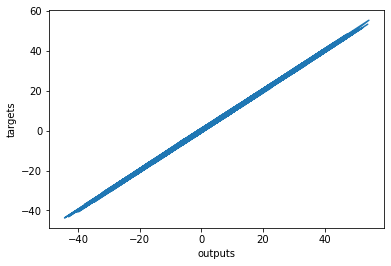

In [16]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()